In [41]:
import pandas as pd

In [42]:
surveys_df = pd.read_csv('../data/raw/surveys.csv')

In [43]:
surveys_df.head(2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN


In [44]:
surveys_df['weight'].describe() # get a summary of staticsts

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [45]:
surveys_df.groupby(['plot_id', 'sex'])['weight'].mean()

plot_id  sex
1        F      46.311138
         M      55.950560
2        F      52.561845
         M      51.391382
3        F      31.215349
         M      34.163241
4        F      46.818824
         M      48.888119
5        F      40.974806
         M      40.708551
6        F      36.352288
         M      36.867388
7        F      20.006135
         M      21.194719
8        F      45.623011
         M      49.641372
9        F      53.618469
         M      49.519309
10       F      17.094203
         M      19.971223
11       F      43.515075
         M      43.366197
12       F      49.831731
         M      48.909710
13       F      40.524590
         M      40.097754
14       F      47.355491
         M      45.159378
15       F      26.670236
         M      27.523691
16       F      25.810427
         M      23.811321
17       F      48.176201
         M      47.558853
18       F      36.963514
         M      43.546952
19       F      21.978599
         M      20.306878

## Summary counts

In [50]:
surveys_df.groupby('unknown column name')

KeyError: 'unknown column name'

In [ ]:
# Group by species, select only the 'record_id' column, 
# then count the number of values in that column for each group
species_counts = surveys_df.groupby('species_id')['record_id'].count()

In [47]:
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

In [48]:
species_counts['UR']

10

## Basic math

In [52]:
surveys_df['weight']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

In [51]:
surveys_df['weight'] * 2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

## Quick & easy plotting using Pandas
* matplotlib
* seaborn

In [54]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()

In [53]:
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

<AxesSubplot:xlabel='species_id'>

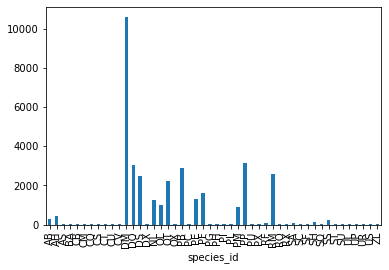

In [55]:
species_counts.plot(kind='bar')

In [56]:
# Lets plot the total number of animals captured at each site:
total_count = surveys_df.groupby('plot_id')['record_id'].count()

In [60]:
print('hello')

hello


In [59]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [63]:
total_count.name

'record_id'

<AxesSubplot:xlabel='plot_id'>

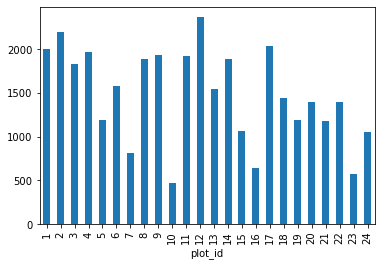

In [57]:
total_count.plot(kind='bar') # keyword argument or named argument

Create a plot of average weight of the animals per site.

In [74]:
surveys_df['weight']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

In [68]:
weight_per_site = surveys_df.groupby('plot_id')['weight'].mean()

<AxesSubplot:xlabel='plot_id'>

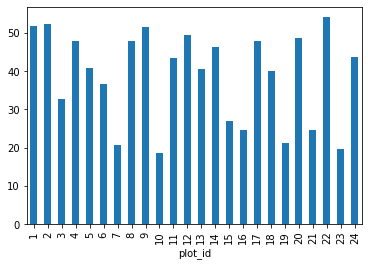

In [70]:
weight_per_site.plot(kind='bar')

Create a bar plot of total males versus total females for the entire dataset.

In [78]:
total_sex_count = surveys_df.groupby('sex')['record_id'].count()

In [79]:
total_sex_count

sex
F    15690
M    17348
Name: record_id, dtype: int64

In [75]:
total_sex_count = surveys_df.groupby('sex')['weight'].count()

In [77]:
total_sex_count

sex
F    15303
M    16879
Name: weight, dtype: int64

<AxesSubplot:xlabel='sex'>

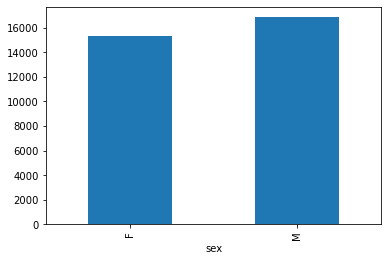

In [76]:
total_sex_count.plot(kind='bar')

Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each site.

In [80]:
help(surveys_df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, squeeze: 'bool' = <object object at 0x7fdd288f36f0>, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        alig

In [81]:
# Get total wegith by sex for each site
total_weight = surveys_df.groupby(['plot_id', 'sex'])['weight'].sum()

In [89]:
total_weight.unstack().head(4)

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0


In [90]:
total_weight.head(5)

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
Name: weight, dtype: float64

<AxesSubplot:xlabel='plot_id,sex'>

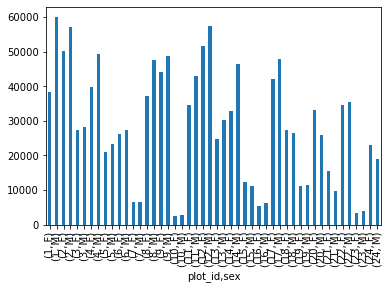

In [84]:
# this doesn't work
total_weight.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='plot_id'>

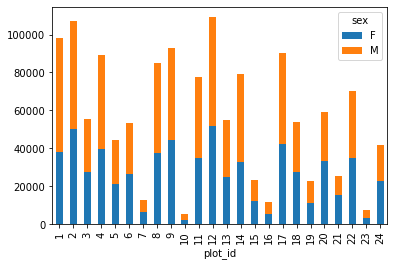

In [93]:
total_weight.unstack().plot(kind='bar', stacked=True)

## Keypoints
* Libraries enable us to extend the functionality of Python.
* Pandas is a popular library for working with data.
* A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row.
* Aggregating data using the groupby() function enables you to generate useful summaries of data quickly.
* Plots can be created from DataFrames or subsets of data that have been generated with groupby().